# Running FreeFem++ inside a Notebook

<div align="right"> <a href="mailto:pascal.lafon@utt.fr">Pascal Lafon</a> - Novembre 2020 </div>

----
### Plotting the response of FreeFem++ on a two parameters space :
* This notebook shows how to plot the output of FreeFem++ with two input parameters vary on a given interval.
* To use this notebook, you will need to have :
    * `FreeFem++` installed on your machine
    * The file `getARV.idp`, which define the function `getARV` in the same folder as this notebook file.
    * The file `cantilver-2D-noplot.edp`, the model of the cantilever beam in the same folder as this notebook file.
    * You must also check that can run `FreeFem++` using the command line `>>FreeFem++ cantilever-2D-noplot.edp`.
    * The file `run_freefem.py`, the python module to pass parameters to `FreeFem++` and read results. This file must be in the same folder as this notebook file. 
    * Read and understand [Run FreeFem++ in notebook](https://github.com/PasLafon/MP06-FreeFem-in-Notebook01/blob/master/FreeFem_in_notebook_01.ipynb) and [Pass parameters to  FreeFem++](https://github.com/PasLafon/MP06-FreeFem-in-Notebook02/blob/master/FreeFem_in_notebook_02.ipynb)
----

### Example of usage :

In this short example, we use the model `cantilver-2D.edp` in which the radius `r` of the hole and the heigth `h` will vary from  $2$ to $8$mm for $r$ and from $20$ to $30$mm for $h$. Then we plot the *von Mises* maximal stress compute from `FreeFem++` as a surface with contour.

This can be usefull to understand the influence of two parameters of the model on the output (here *von Mises* maximal stress).

In [33]:
import run_freefem as rf        # Importation of module run_freefem, named 'rf'
import numpy as np              # Numpy for array

# number of value for each parameter
npts = 20
# npts values of radius from 2 to 8 mm:
r_val = np.linspace(2,8,npts)
# npts values of height from 20 to 30 mm:
h_val = np.linspace(20,30,npts)

# Initialize an npts x npts array of zeros ..
sigma = np.zeros((npts,npts))

# Two nested loop so npts x npts FreeFem++ call ...
# -> enumerate list index and element of an array ..
for i,r in enumerate(r_val):
    for j,h in enumerate(h_val):
        # Define input values with a Dictionary in Python (https://www.w3schools.com/python/python_dictionaries.asp)
        # The keys 'l','h','r' correspond to the name of input arguments define in the '.edp' file.
        input_value = {'l':400,'h':h,'r':r}
        Out = rf.run_freefem('cantilever-2D-noplot.edp',input_value)
        # Out[0]-> an array of output values
        #  (depending on how many output values are written in the '.edp' file)
        # Out[0][2] -> the third value of this array.
        sigma[i,j]=Out[0][2]

# The previous loop can take several minute .. the results are save in a file
# in order to test easily several plot without running again the loop.
np.save('data.npy',sigma)

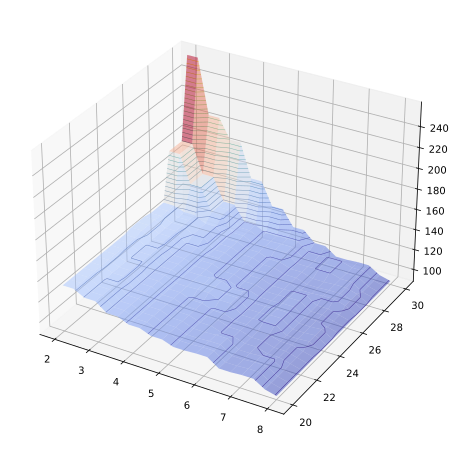

In [39]:
# Load the result
sigma=np.load('data.npy')
# Plot the results :
import matplotlib.pyplot as plt # pyplot from matplotlib to plot graphics.
%config InlineBackend.figure_format = 'svg'
# Import colormap 
from matplotlib import cm
# Create a figure with 3D axes ..
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(8,8))
# Define the meshgrid from r_val and h_val
X,Y = np.meshgrid(r_val,h_val)
# Plot a surface
ax.plot_surface(X,Y,sigma,cmap=cm.coolwarm,alpha=0.5)
# Plot contour of the surface 
ax.contour(X,Y,sigma,50,linewidths=0.5)